In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from adjustText import adjust_text


sns.set(style="whitegrid")

In [2]:
TARGETS = ['England-Premier-League', 'Spain-LaLiga', 'Italy-Serie-A', 'Germany-Bundesliga', 'France-Ligue-1']
N_SIMILAR = 30

In [3]:
PL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/England-Premier-League"
L1 = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/France-Ligue-1"
GB = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Germany-Bundesliga"
SA = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Italy-Serie-A"
LL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Spain-LaLiga"

In [4]:
DETAILED_LIST = [
    ## Defensive
    'Tackles',
    'Interception',
    'Fouls',
    'Cards',
    'Offsides',
    'Clearances',
    'Blocks',
    'Saves',

    ## Offensive
    'Shots',
    'Goals',
    'Dribbles',
    'Possession loss',
    'Aerial',

    ## Passing
    'Passes',
    'Key passes',
    'Assists'
]

# 1.Player Stats, Team Stats

In [5]:
PL_TEAM_STATS = f'{PL}/22-23_teams_stats-cleaned.csv'
L1_TEAM_STATS = f'{L1}/22-23_teams_stats-cleaned.csv'
GB_TEAM_STATS = f'{GB}/22-23_teams_stats-cleaned.csv'
SA_TEAM_STATS = f'{SA}/22-23_teams_stats-cleaned.csv'
LL_TEAM_STATS = f'{LL}/22-23_teams_stats-cleaned.csv'

pl_team_stats_df = pd.read_csv(PL_TEAM_STATS)
l1_team_stats_df = pd.read_csv(L1_TEAM_STATS)
gb_team_stats_df = pd.read_csv(GB_TEAM_STATS)
sa_team_stats_df = pd.read_csv(SA_TEAM_STATS)
ll_team_stats_df = pd.read_csv(LL_TEAM_STATS)

pl_team_stats_df['League'] = 'England-Premier-League'
l1_team_stats_df['League'] = 'France-Ligue-1'
gb_team_stats_df['League'] = 'Germany-Bundesliga'
sa_team_stats_df['League'] = 'Italy-Serie-A'
ll_team_stats_df['League'] = 'Spain-LaLiga'

all_teams_stats = pd.concat([
    pl_team_stats_df,
    l1_team_stats_df,
    gb_team_stats_df,
    sa_team_stats_df,
    ll_team_stats_df    
], ignore_index=True)

print(all_teams_stats.head(10))
all_teams_stats.to_csv('./Leagues/all_teams_stats.csv', index=False)

           team_name   P   W   D   L  GF  GA  GD  Pts  Goals  ...  \
0    Manchester City  38  28   5   5  94  33  61   89     94  ...   
1            Arsenal  38  26   6   6  88  43  45   84     88  ...   
2  Manchester United  38  23   6   9  58  43  15   75     58  ...   
3          Newcastle  38  19  14   5  68  33  35   71     68  ...   
4          Liverpool  38  19  10   9  75  47  28   67     75  ...   
5           Brighton  38  18   8  12  72  53  19   62     72  ...   
6        Aston Villa  38  18   7  13  51  46   5   61     51  ...   
7          Tottenham  38  18   6  14  70  63   7   60     70  ...   
8          Brentford  38  15  14   9  58  46  12   59     58  ...   
9             Fulham  38  15   7  16  55  53   2   52     55  ...   

   Offsides pg  Shots OT pg  Dribbles pg  Fouled pg     xG  GoalsDiff  xGDiff  \
0          1.3          5.8          5.8        5.8  81.39         92   10.61   
1          1.5          5.4          5.4        5.4  71.36         84   12.64 

In [6]:
PL_PLAYER_STATS = f'{PL}/22-23_players_stats-cleaned.csv'
L1_PLAYER_STATS = f'{L1}/22-23_players_stats-cleaned.csv'
GB_PLAYER_STATS = f'{GB}/22-23_players_stats-cleaned.csv'
SA_PLAYER_STATS = f'{SA}/22-23_players_stats-cleaned.csv'
LL_PLAYER_STATS = f'{LL}/22-23_players_stats-cleaned.csv'

pl_players_stats_df = pd.read_csv(PL_PLAYER_STATS)
l1_players_stats_df = pd.read_csv(L1_PLAYER_STATS)
gb_players_stats_df = pd.read_csv(GB_PLAYER_STATS)
sa_players_stats_df = pd.read_csv(SA_PLAYER_STATS)
ll_players_stats_df = pd.read_csv(LL_PLAYER_STATS)

all_players_stats = pd.concat([
    pl_players_stats_df,
    l1_players_stats_df,
    gb_players_stats_df,
    sa_players_stats_df,
    ll_players_stats_df,    
])

all_players_stats.head(10)
all_players_stats.to_csv('./Leagues/all_players_stats.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


# 2.Player Values, Team Values

In [7]:
PL_TEAM_VALUES = f'{PL}/22-23_teams_values-cleaned.csv'
L1_TEAM_VALUES = f'{L1}/22-23_teams_values-cleaned.csv'
GB_TEAM_VALUES = f'{GB}/22-23_teams_values-cleaned.csv'
SA_TEAM_VALUES = f'{SA}/22-23_teams_values-cleaned.csv'
LL_TEAM_VALUES = f'{LL}/22-23_teams_values-cleaned.csv'

pl_team_values_df = pd.read_csv(PL_TEAM_VALUES)
l1_team_values_df = pd.read_csv(L1_TEAM_VALUES)
gb_team_values_df = pd.read_csv(GB_TEAM_VALUES)
sa_team_values_df = pd.read_csv(SA_TEAM_VALUES)
ll_team_values_df = pd.read_csv(LL_TEAM_VALUES)

all_teams_values = pd.concat([
    pl_team_values_df,
    l1_team_values_df,
    gb_team_values_df,
    sa_team_values_df,
    ll_team_values_df,    
])

all_teams_values.head(10)
all_teams_values.to_csv('./Leagues/all_teams_values.csv', index=False)

In [8]:
PL_PLAYER_VALUES = f'{PL}/22-23_players_values-cleaned.csv'
L1_PLAYER_VALUES = f'{L1}/22-23_players_values-cleaned.csv'
GB_PLAYER_VALUES = f'{GB}/22-23_players_values-cleaned.csv'
SA_PLAYER_VALUES = f'{SA}/22-23_players_values-cleaned.csv'
LL_PLAYER_VALUES = f'{LL}/22-23_players_values-cleaned.csv'

pl_player_values_df = pd.read_csv(PL_PLAYER_VALUES)
l1_player_values_df = pd.read_csv(L1_PLAYER_VALUES)
gb_player_values_df = pd.read_csv(GB_PLAYER_VALUES)
sa_player_values_df = pd.read_csv(SA_PLAYER_VALUES)
ll_player_values_df = pd.read_csv(LL_PLAYER_VALUES)

all_players_values = pd.concat([
    pl_player_values_df,
    l1_player_values_df,
    gb_player_values_df,
    sa_player_values_df,
    ll_player_values_df,    
])

all_players_values.head(10)
all_players_values.to_csv('./Leagues/all_players_values.csv', index=False)

In [9]:
# merged_df = pd.merge(all_players_stats, all_players_values, left_on='player_name', right_on='Name', how='left')
# merged_df['position'] = merged_df['Position']

# columns_to_keep = all_players_stats.columns.tolist()
# updated_all_players_stats = merged_df[columns_to_keep]

# updated_all_players_stats.drop(columns=['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6'], inplace=True)
# updated_all_players_stats.head()

# updated_all_players_stats.to_csv('./Leagues/all_players_stats.csv', index=False)

# 3.Player Detailed Stats

In [10]:
def read_detailed_csv(path):
    detailed = DETAILED_LIST[0]
    df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
    for detailed in DETAILED_LIST[1:]:
        next_df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
        df = pd.merge(df, next_df, on=['player_name', 'team_name'], how='inner')
    
    return df

pl_player_detailed_df = read_detailed_csv(PL)
l1_player_detailed_df = read_detailed_csv(L1)
gb_player_detailed_df = read_detailed_csv(GB)
sa_player_detailed_df = read_detailed_csv(SA)
ll_player_detailed_df = read_detailed_csv(LL)

all_players_details = pd.concat([
    pl_player_detailed_df,
    l1_player_detailed_df,
    gb_player_detailed_df,
    sa_player_detailed_df,
    ll_player_detailed_df,    
])

all_players_details.head(10)
all_players_details.to_csv('./Leagues/all_players_stats_details.csv', index=False)

# 4.포지션별로 각 리그의 top3 팀선수들 선택

In [11]:
all_teams_stats.head(10)

team_name   P   W   D   L  GF  GA  GD  Pts  Goals  ...  \
0    Manchester City  38  28   5   5  94  33  61   89     94  ...   
1            Arsenal  38  26   6   6  88  43  45   84     88  ...   
2  Manchester United  38  23   6   9  58  43  15   75     58  ...   
3          Newcastle  38  19  14   5  68  33  35   71     68  ...   
4          Liverpool  38  19  10   9  75  47  28   67     75  ...   
5           Brighton  38  18   8  12  72  53  19   62     72  ...   
6        Aston Villa  38  18   7  13  51  46   5   61     51  ...   
7          Tottenham  38  18   6  14  70  63   7   60     70  ...   
8          Brentford  38  15  14   9  58  46  12   59     58  ...   
9             Fulham  38  15   7  16  55  53   2   52     55  ...   

   Offsides pg  Shots OT pg  Dribbles pg  Fouled pg     xG  GoalsDiff  xGDiff  \
0          1.3          5.8          5.8        5.8  81.39         92   10.61   
1          1.5          5.4          5.4        5.4  71.36         84   12.64   
2          2.1          5.7          5.7        5.7  67.92         56  -11.92   
3          1.9          5.2          5.2        5.2  73.75         64   -9.75   
4          2.2          5.6          5.6        5.6  78.59         71   -7.59   
5          1.8          6.1          6.1        6.1  76.71         68   -8.71   
6          1.5          4.0          4.0        4.0  49.51         49   -0.51   
7          1.8          5.2          5.2        5.2  57.52         68   10.48   
8          1.9          4.3          4.3        4.3  58.25         56   -2.25   
9          1.6          3.9          3.9        3.9  48.00         52    4.00   

   Shots  xG/shots                  League  
0    600      0.14  England-Premier-League  
1    593      0.12  England-Premier-League  
2    593      0.11  England-Premier-League  
3    571      0.13  England-Premier-League  
4    605      0.13  England-Premier-League  
5    613      0.13  England-Premier-League  
6    431      0.11  England-Premier-League  
7    518      0.11  England-Premier-League  
8    408      0.14  England-Premier-League  
9    429      0.11  England-Premier-League  

[10 rows x 30 columns]

In [12]:
def group_top_teams_by_position(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
    print(top_teams)
    
    top_teams_df = all_players_stats[all_players_stats['team_name'].isin(top_teams)].copy()
    top_teams_df.loc[:, 'positions'] = top_teams_df[['position_1', 'position_2', 'position_3', 'position_4', 'position_5']].apply(
        lambda x: [pos.strip() for pos in x if pd.notna(pos)], axis=1)
    
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        
        for pos in player_positions:
            position_groups[pos].append(player_name)
    
    return position_groups, top_teams

position_groups, top_teams = group_top_teams_by_position(all_players_stats, all_teams_stats)
# del position_groups['GK']

['Napoli', 'Manchester City', 'Barcelona', 'Paris Saint-Germain', 'Arsenal', 'Lens', 'Real Madrid', 'Atletico Madrid', 'Manchester United', 'Lazio', 'Marseille', 'Inter', 'Newcastle', 'Bayern Munich', 'Borussia Dortmund']


In [13]:
for key, value in position_groups.items():
    print(key, value)

RB ['Kieran Trippier', 'Thomas Partey', 'João Cancelo', 'Diogo Dalot', 'Aaron Wan-Bissaka', 'John Stones', 'Ben White', 'Victor Lindelöf', 'Manuel Akanji', 'Rico Lewis', 'Kyle Walker', 'Jacob Murphy', 'Takehiro Tomiyasu', 'Rob Holding', 'Javier Manquillo', 'Cédric Soares', 'Emil Krafth', 'Przemyslaw Frankowski', 'Valentin Rongier', 'Jonathan Clauss', 'Jonathan Gradit', 'Achraf Hakimi', 'Sergio Ramos', 'Chancel Mbemba', 'Nordi Mukiele', 'Marquinhos', 'Issa Kaboré', 'Eric Bailly', 'Timothée Pembélé', 'Joshua Kimmich', 'João Cancelo', 'Benjamin Pavard', 'Emre Can', 'Noussair Mazraoui', 'Marius Wolf', 'Niklas Süle', 'Julian Ryerson', 'Felix Passlack', 'Thomas Meunier', 'Josip Stanisic', 'Bouna Sarr', 'Giovanni Di Lorenzo', 'Patric', 'Denzel Dumfries', 'Adam Marusic', 'Matteo Darmian', 'Manuel Lazzari', 'Elseid Hysaj', 'Bartosz Bereszynski', "Danilo D'Ambrosio", 'Alessandro Zanoli', 'Éder Militão', 'Jules Koundé', 'José Giménez', 'Ronald Araujo', 'Alejandro Balde', 'Marcos Llorente', 'Nahue

# 3.포지션별 스탯 평균치 구하기

In [14]:
## all_players_stats에서 필요한 컬럼 선택
columns_to_add = ['xG', 'xGDiff', 'xGPerNinety', 'xGPerShot']
player_xg_stats = all_players_stats[['player_name'] + columns_to_add]

## all_players_details와 player_xg_stats 병합
all_players_details = pd.merge(all_players_details, player_xg_stats, on='player_name', how='left')

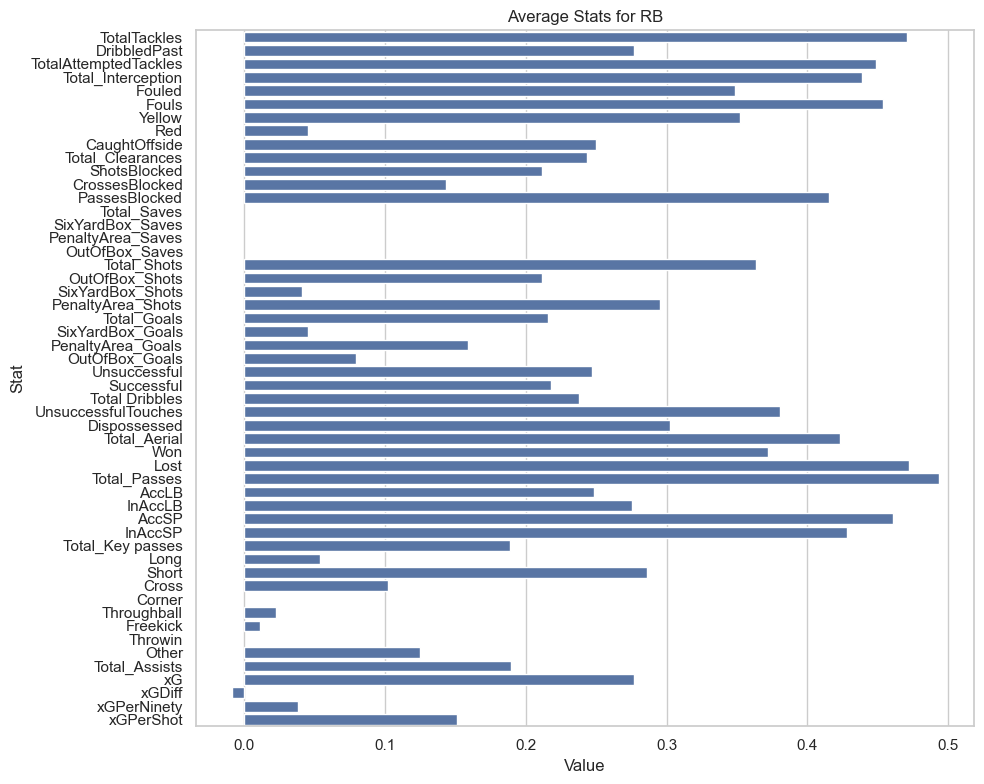

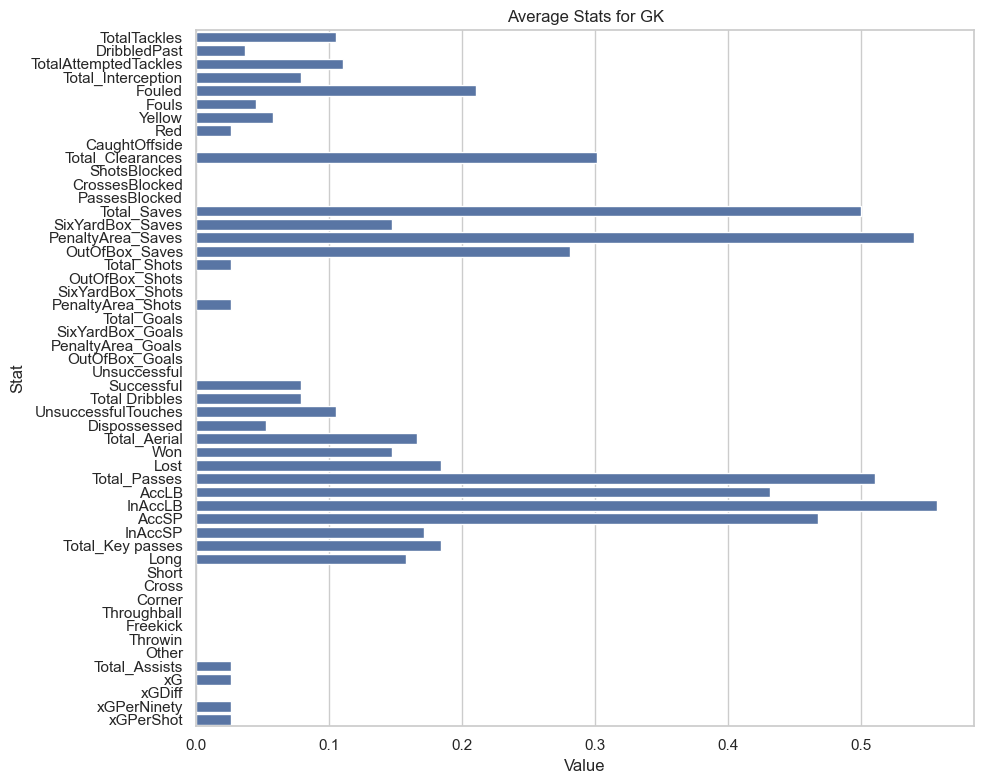

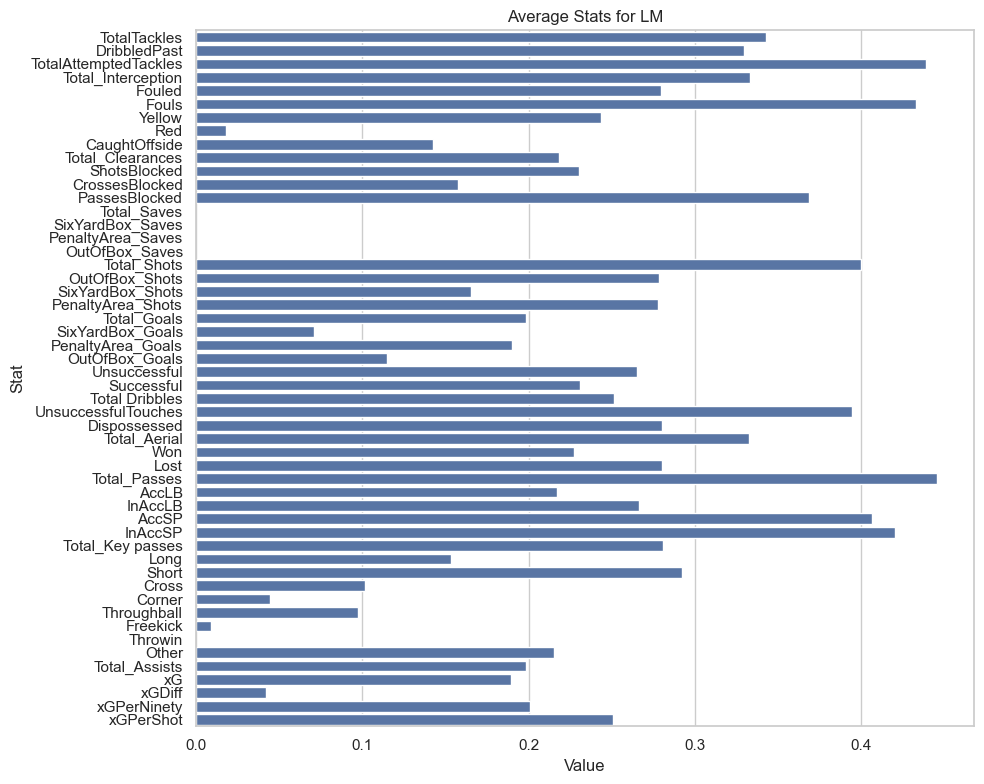

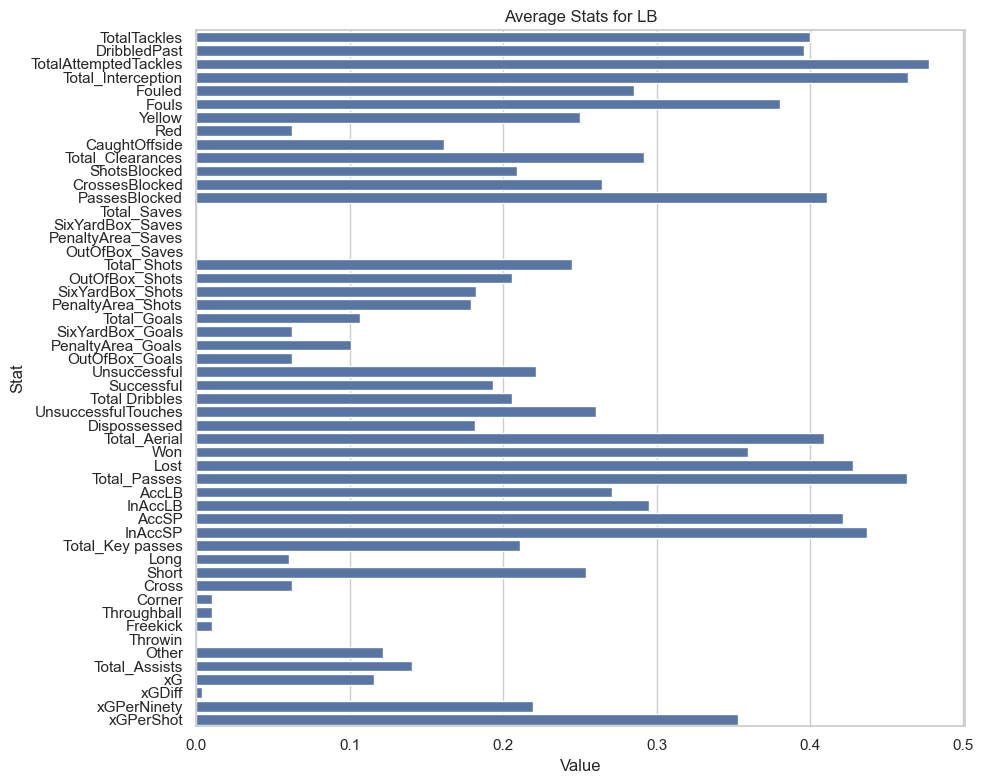

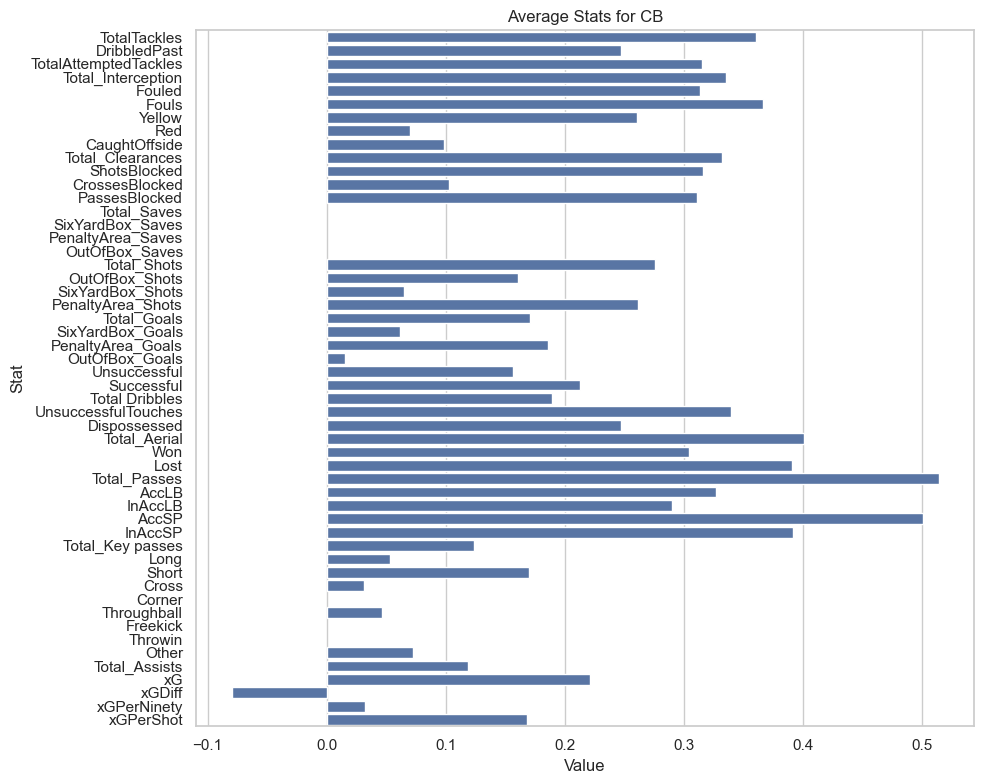

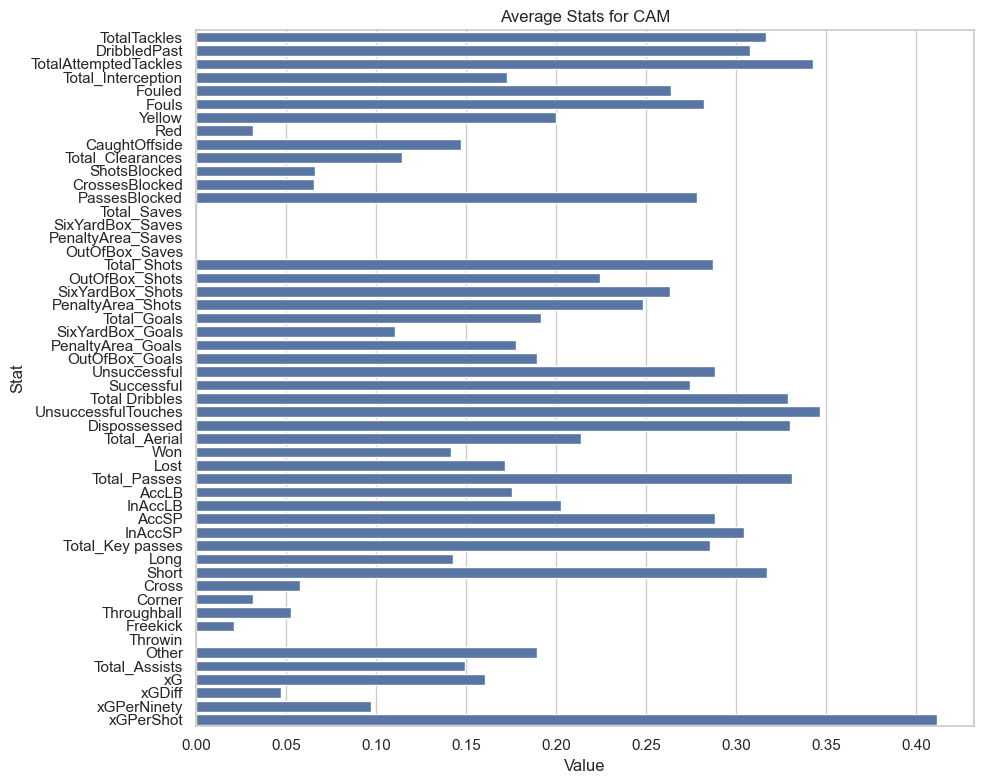

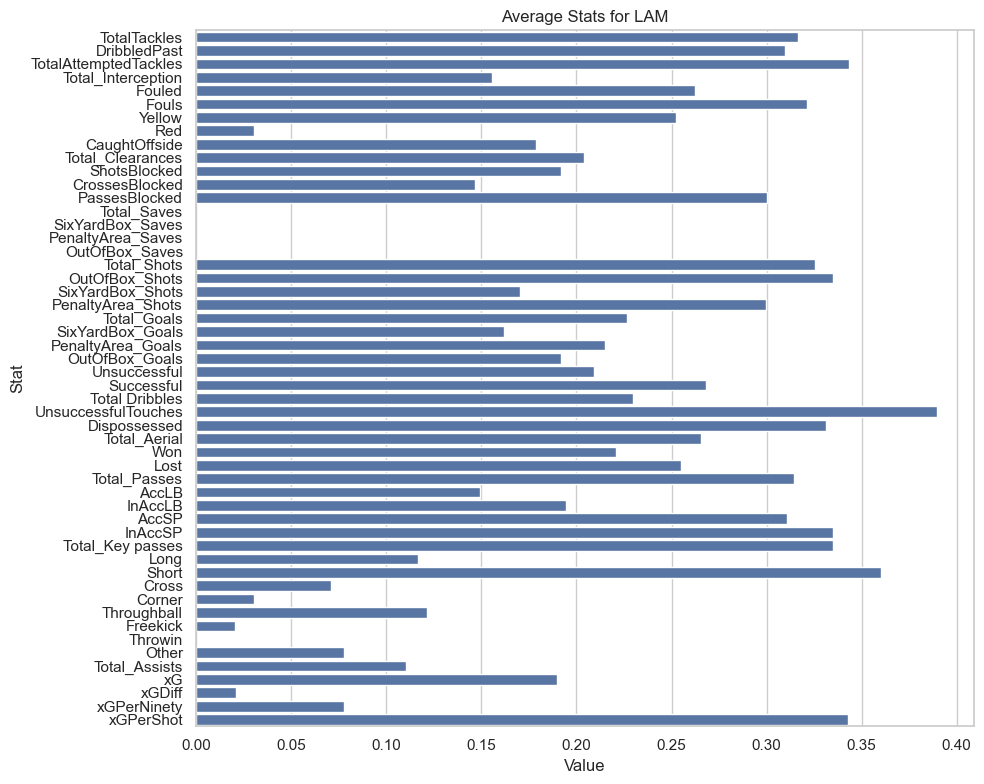

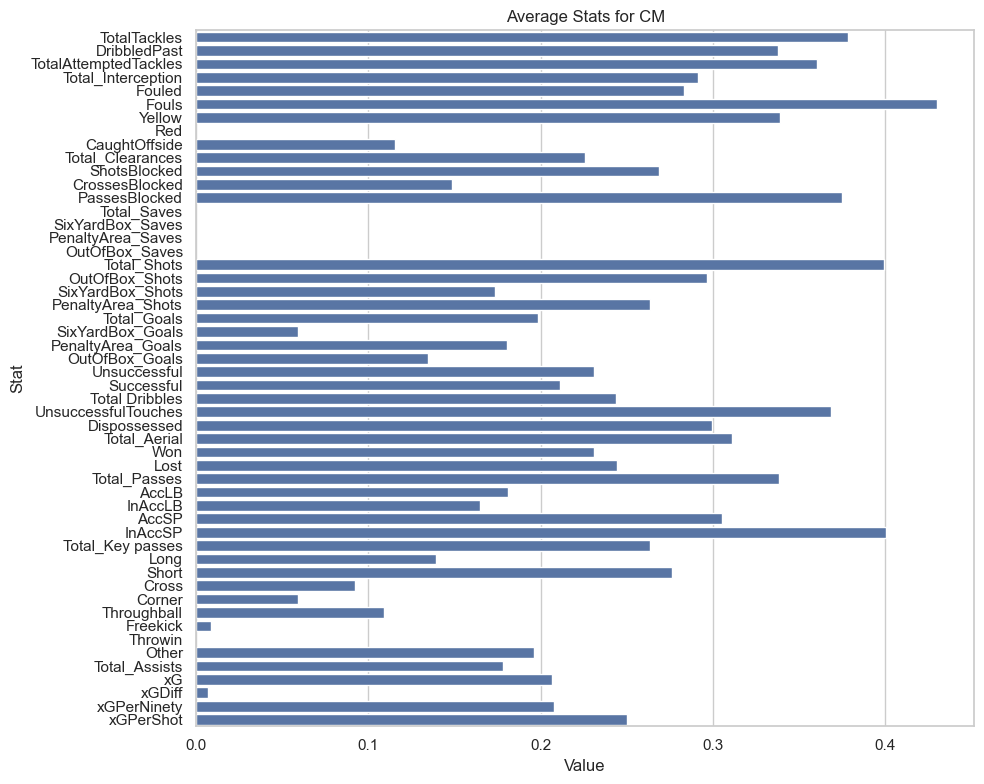

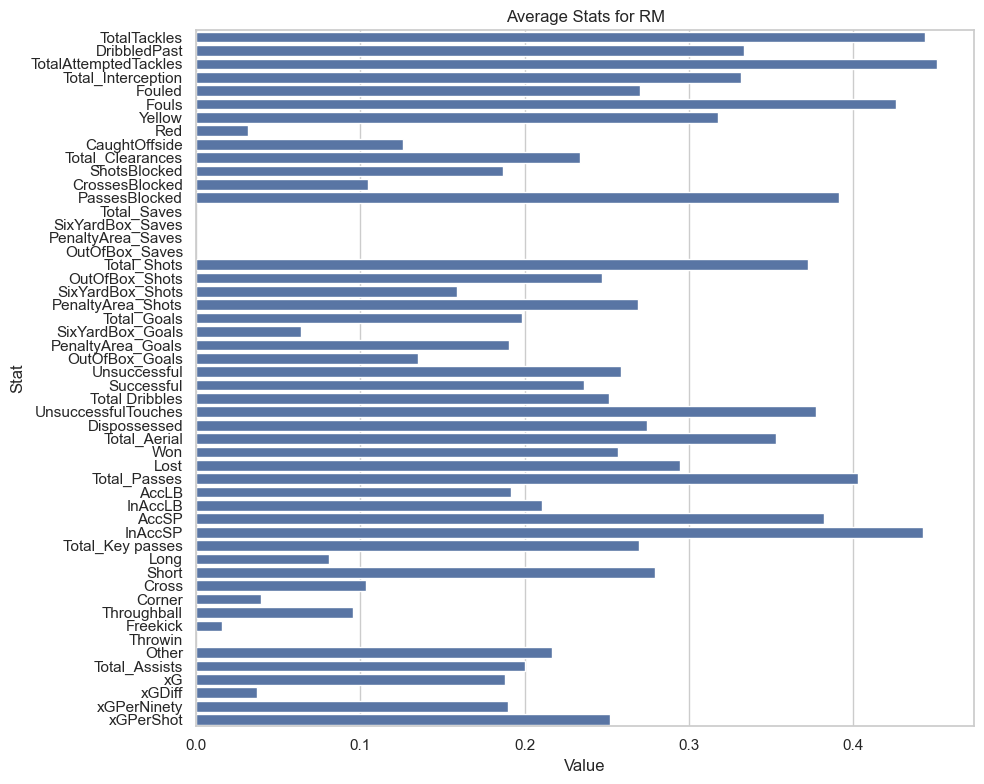

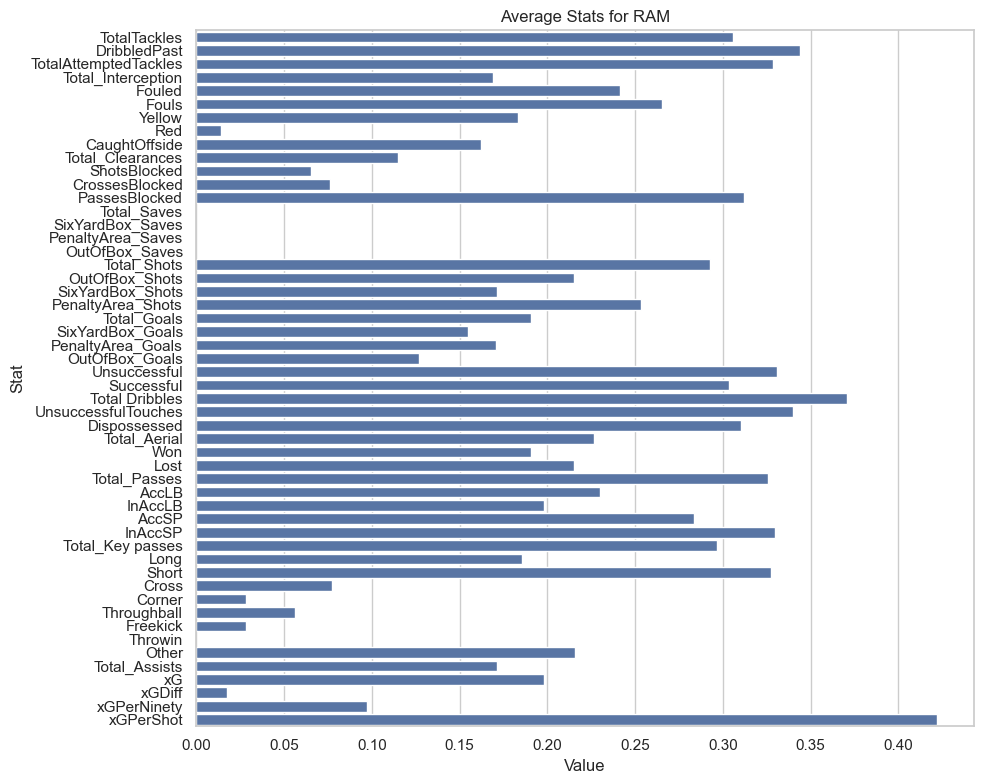

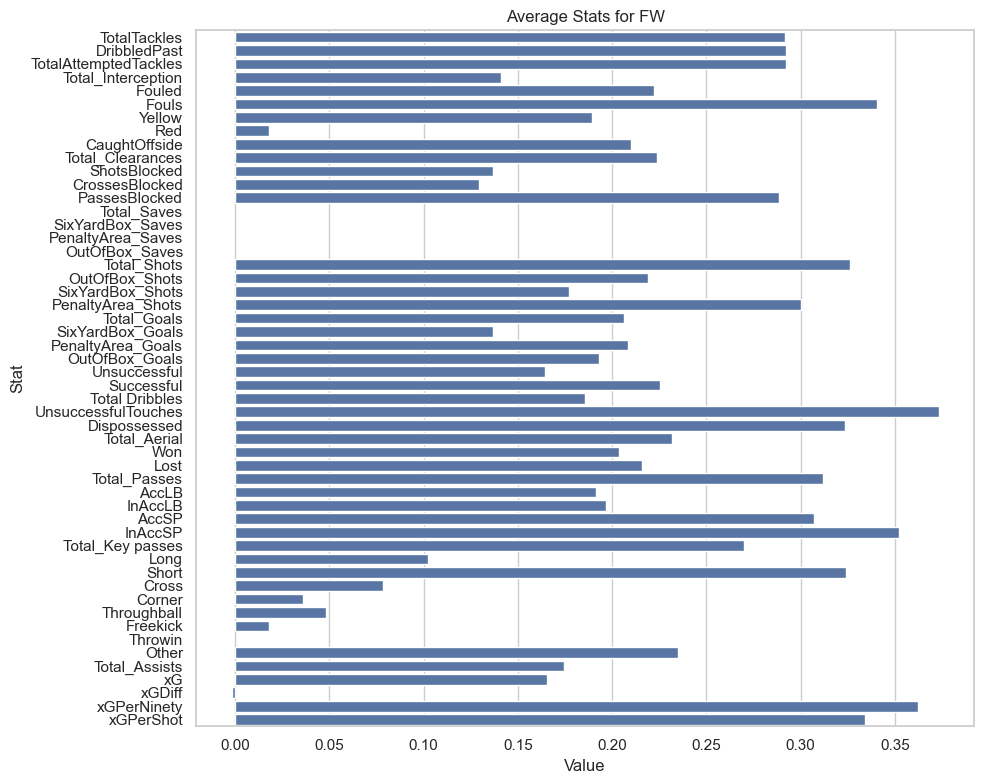

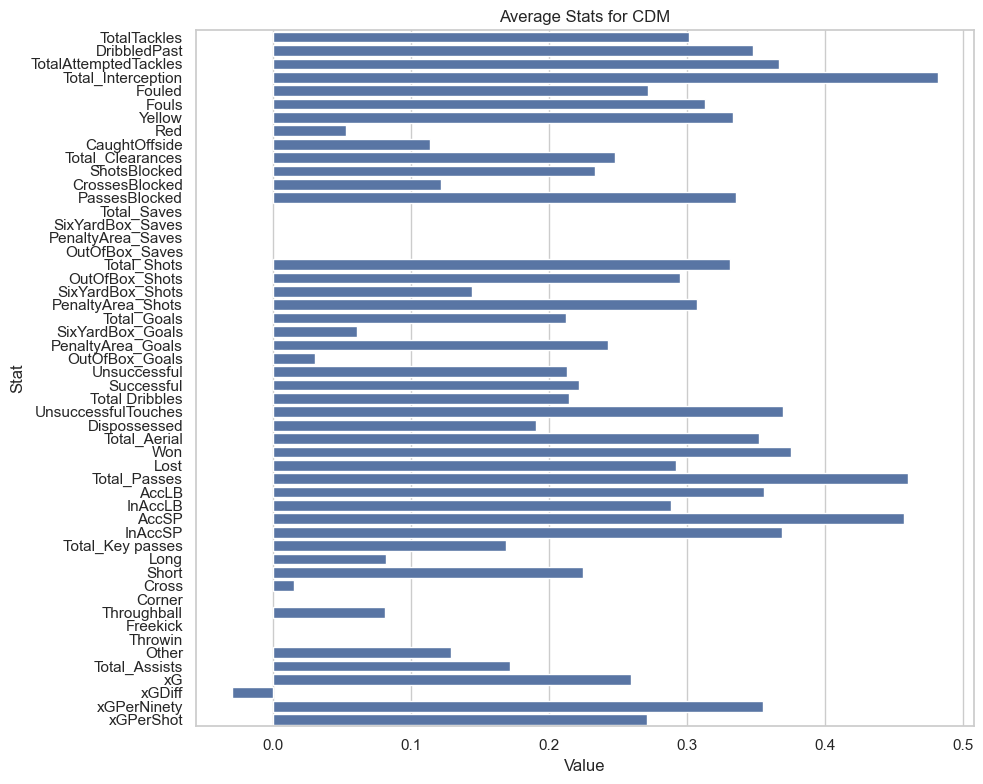

In [15]:
for position, players in position_groups.items():
    position_df = all_players_details[all_players_details['player_name'].isin(players)].copy()
    numeric_cols = position_df.select_dtypes(include=[float, int]).columns
    position_df.loc[:, numeric_cols] = position_df.loc[:, numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).apply(lambda x: x/x.max(), axis=0)
    mean_stats = position_df.mean(numeric_only=True).reset_index()
    mean_stats.columns = ['Stat', 'Value']
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Value', y='Stat', data=mean_stats)
    plt.title(f"Average Stats for {position}")
    plt.tight_layout()
    plt.show()

#  4.4위부터 꼴찌팀까지 소속 선수들 중 top3팀 선수들의 평균스탯과 가장 가까운 선수들 구하기.

In [16]:
def extract_number_from_apps(apps):
    if pd.isna(apps):
        return 0
    match = re.search(r'(\d+)', str(apps))
    return int(match.group(1)) if match else 0

all_players_stats['Apps_numeric'] = all_players_stats['Apps'].apply(extract_number_from_apps) ## 출전 경기수 컬럼을 숫자형으로 처리

In [17]:
positions = list(position_groups.keys())
positions

['RB', 'GK', 'LM', 'LB', 'CB', 'CAM', 'LAM', 'CM', 'RM', 'RAM', 'FW', 'CDM']

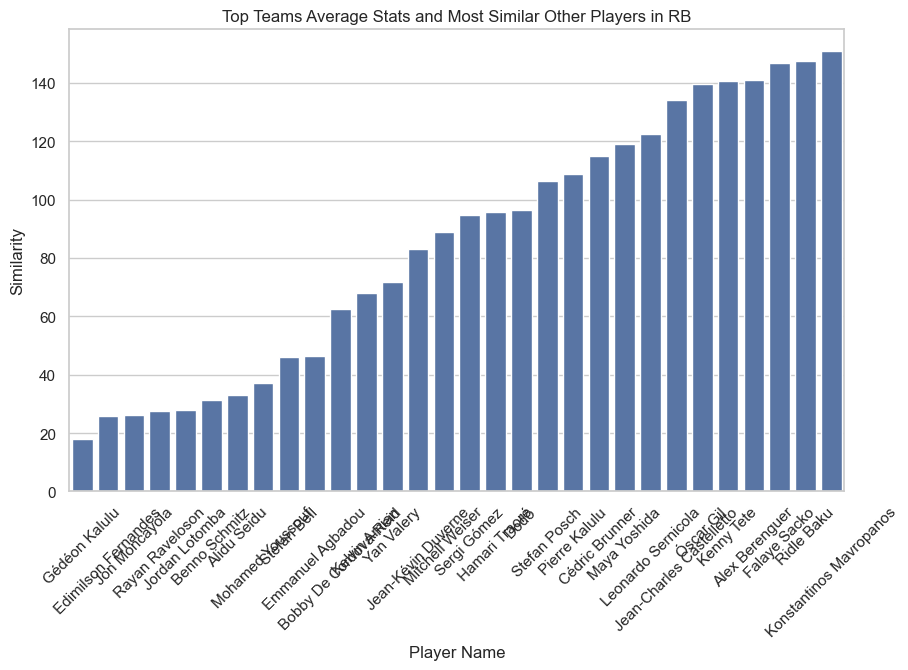

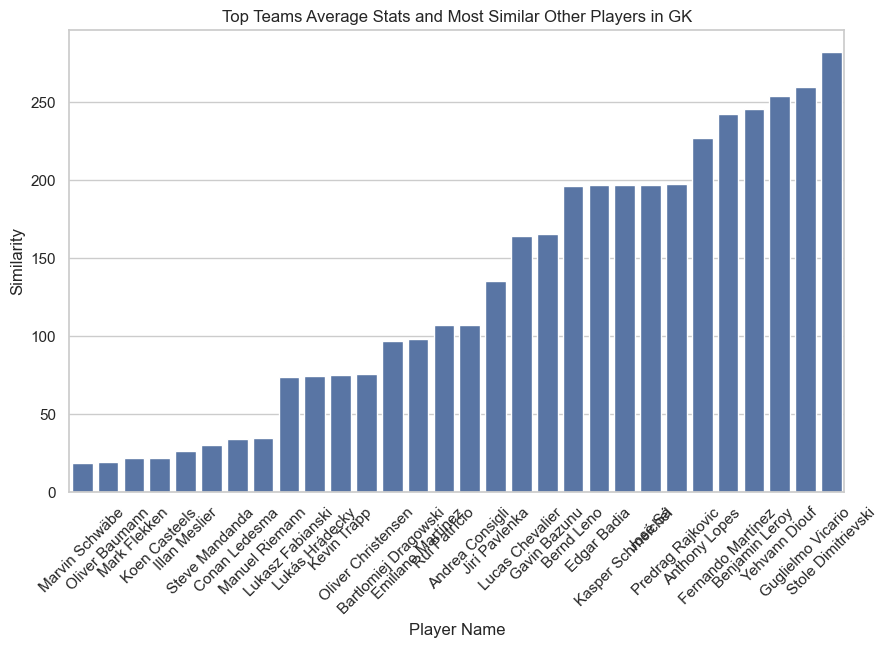

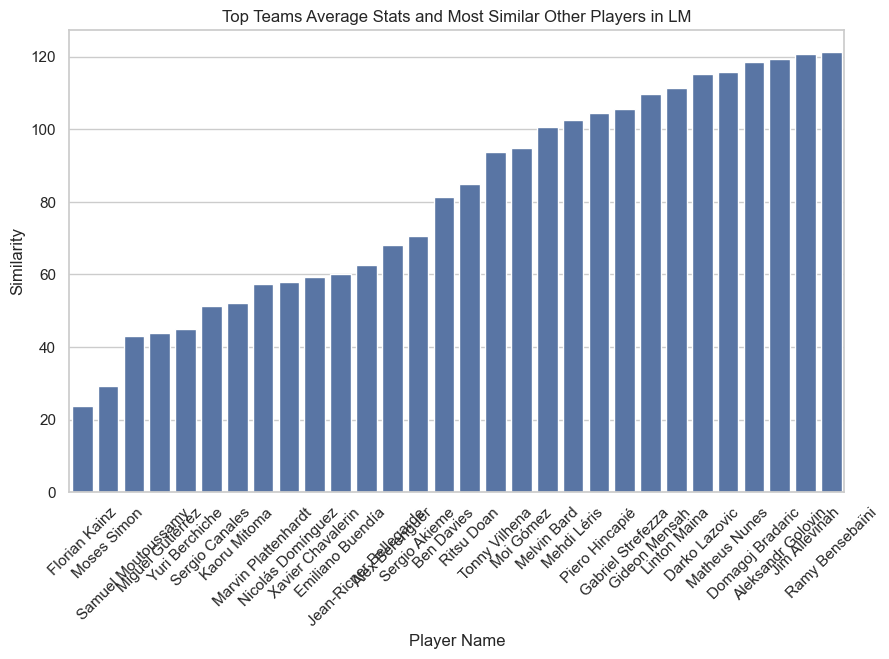

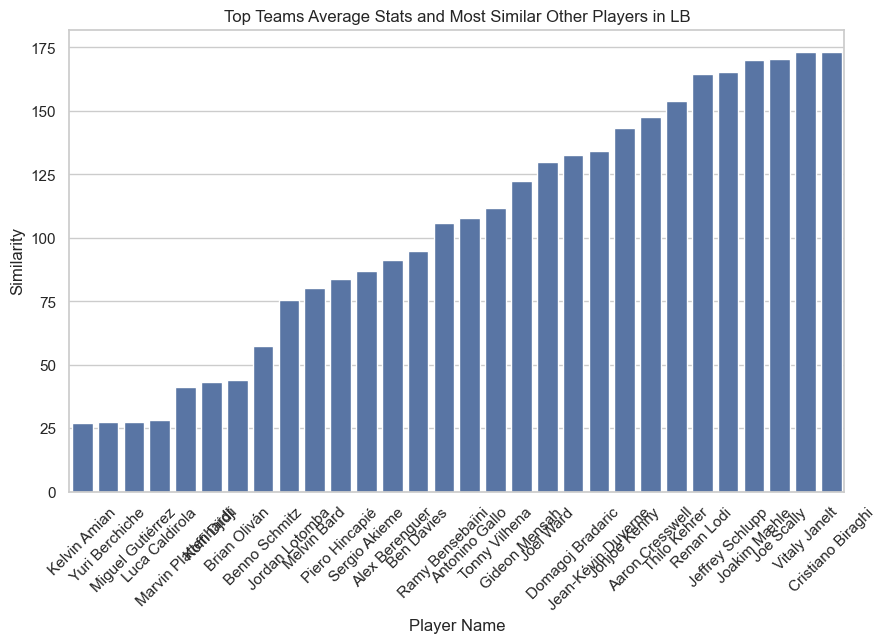

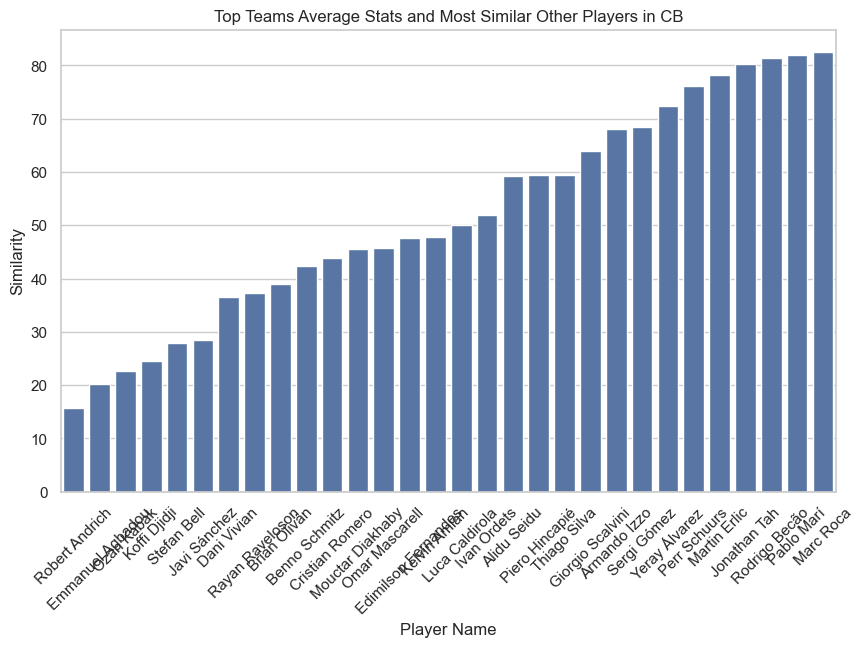

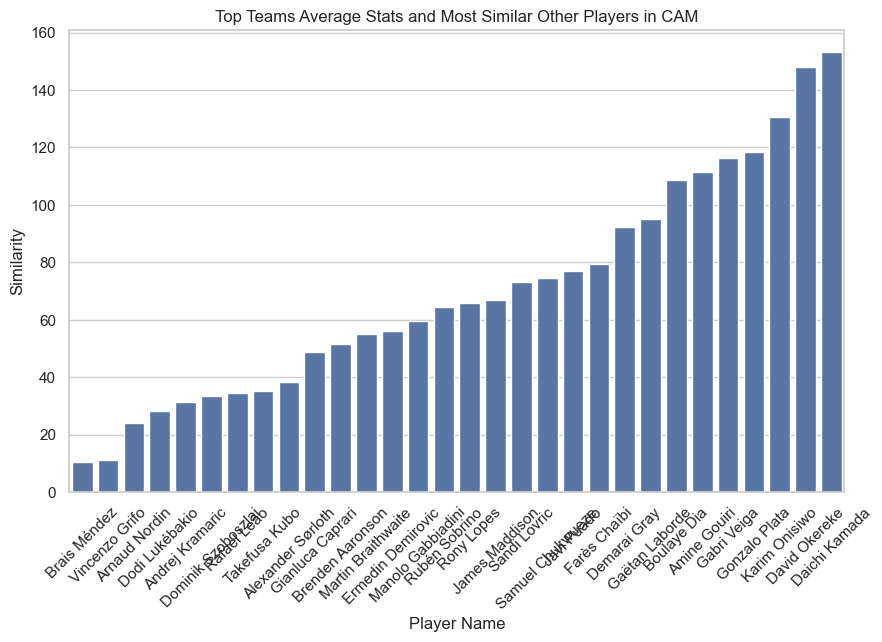

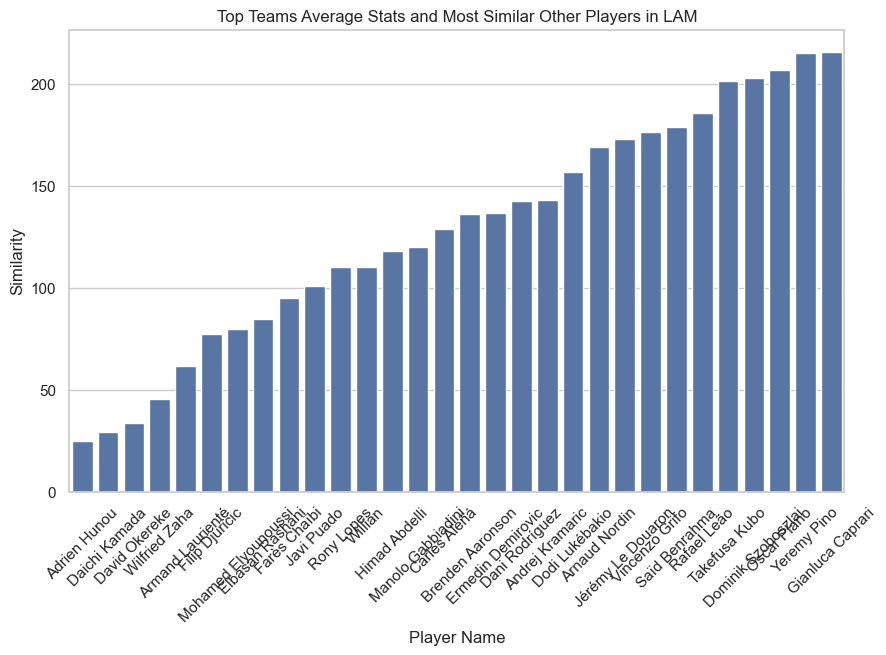

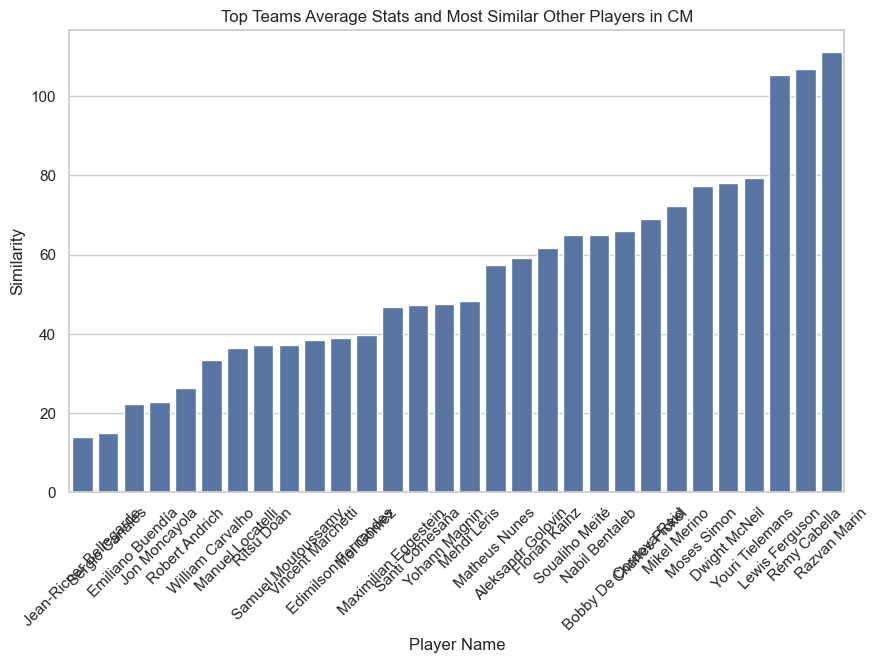

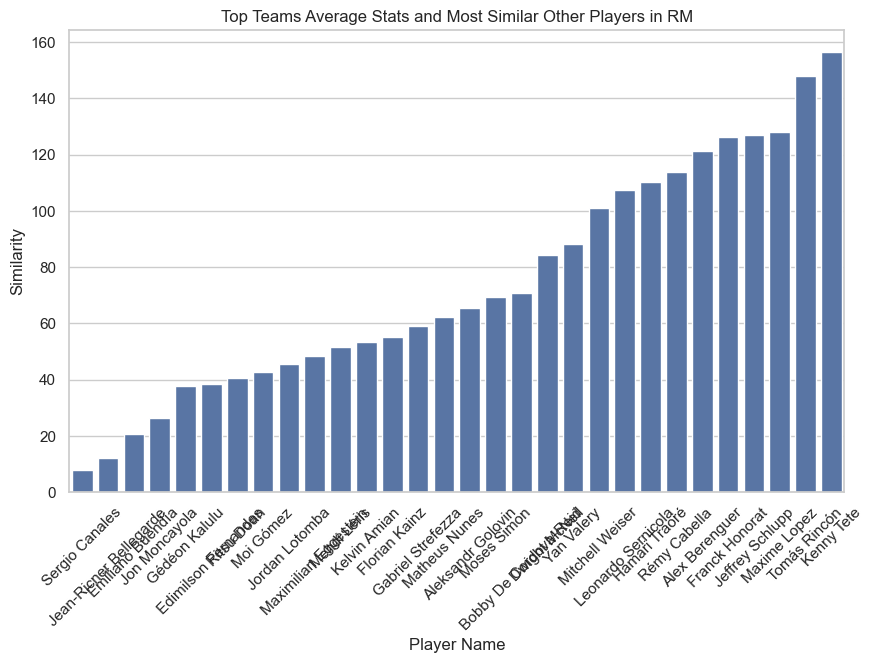

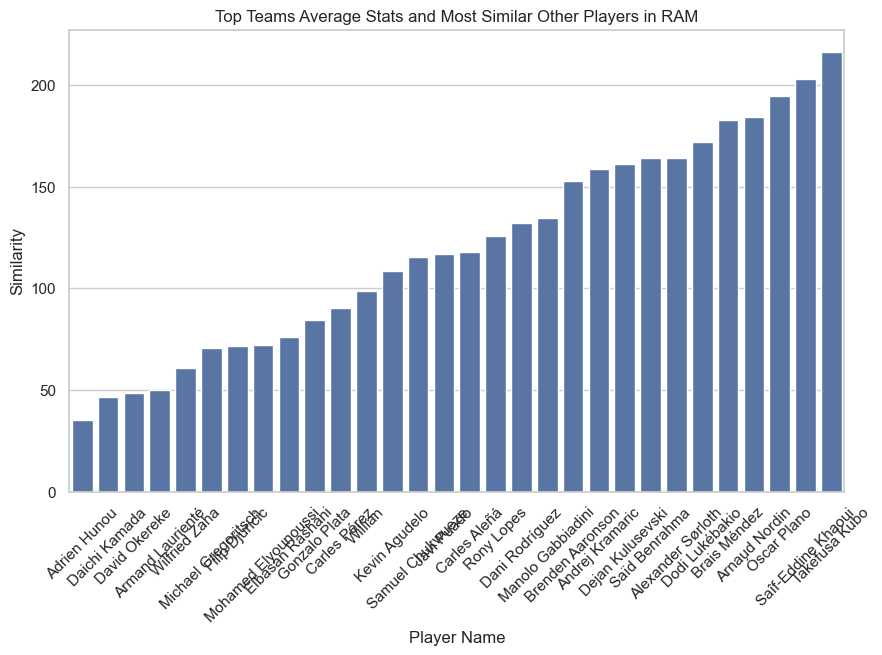

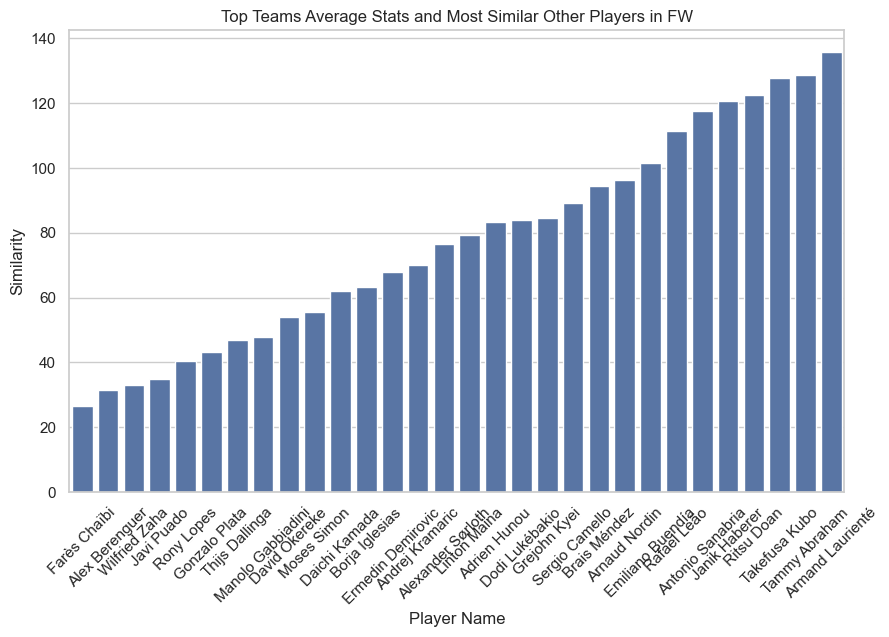

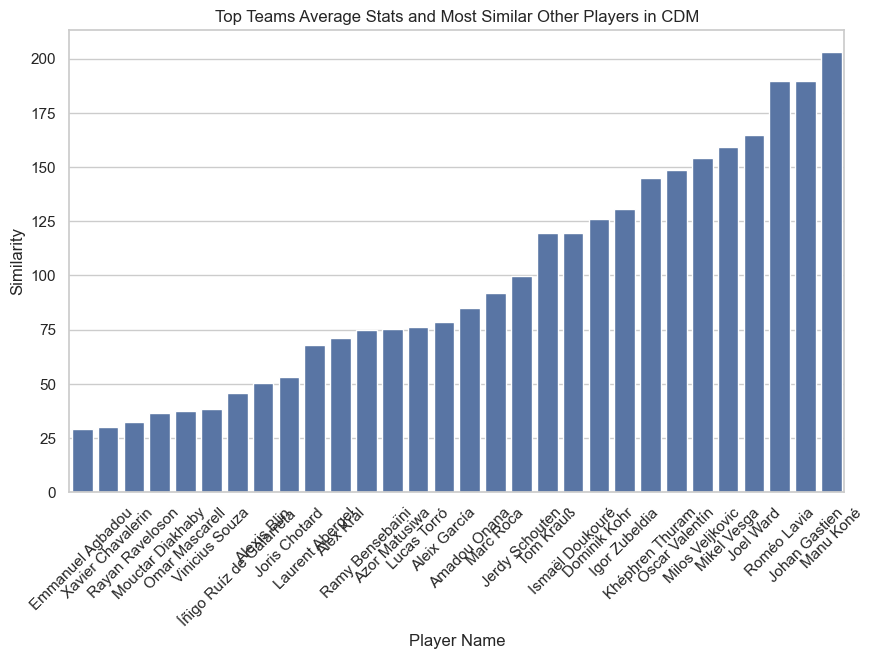

In [18]:
similar_players_by_position = {}

for position in positions:
    ## top3팀 선수들 중 현재 포지션에 해당하는 선수들만 필터링
    # top_position_players = all_players_stats[(all_players_stats['team_name'].isin(top_teams)) & 
    #                                          (all_players_stats['position'].str.contains(position))].copy()
    top_position_players = all_players_stats[(all_players_stats['team_name'].isin(top_teams)) &
                                             (all_players_stats['position'].str.contains(position)) &
                                             (all_players_stats['Apps_numeric'] >= 20)].copy()

    ## 스탯이 숫자인 열만 선택
    numeric_cols = top_position_players.select_dtypes(include=[np.number]).columns
    top_position_players[numeric_cols] = top_position_players[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    ## 포지션별 평균 스탯 계산
    position_mean_stats = top_position_players[numeric_cols].mean()

    ## 나머지 팀의 선수 중 현재 포지션에 해당하는 선수들
    # non_top_position_players = all_players_stats[(~all_players_stats['team_name'].isin(top_teams)) & 
    #                                              (all_players_stats['position'].str.contains(position))].copy()
    non_top_position_players = all_players_stats[(~all_players_stats['team_name'].isin(top_teams)) & 
                                                 (all_players_stats['position'].str.contains(position)) &
                                                 (all_players_stats['Apps_numeric'] >= 20)].copy()
    
    non_top_position_players[numeric_cols] = non_top_position_players[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    ## 유사도 계산
    non_top_position_players['similarity'] = non_top_position_players[numeric_cols].apply(
        lambda x: euclidean(x, position_mean_stats), axis=1
    )

    ## 평균과 가장 유사한 선수들을 선별.(유사도가 낮을수록 유사함.)
    similar_players = non_top_position_players.nsmallest(N_SIMILAR, 'similarity')
    similar_players_by_position[position] = similar_players

for position, data in similar_players_by_position.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='player_name', y='similarity')
    plt.title(f'Top Teams Average Stats and Most Similar Other Players in {position}')
    plt.xlabel('Player Name')
    plt.ylabel('Similarity')
    plt.xticks(rotation=45)
    plt.show()

# Market value 반영

In [19]:
def convert_market_value(value):
    ## 값이 비어있거나 € 기호만 있는 경우 0으로 처리해야 된다.
    if not value or value.strip('€').strip().isalpha():
        return 0
    ## € 기호와 단위(m, k) 제거
    number_part = value.strip('€').replace('m', '').replace('k', '').strip()

    try:
        number = float(number_part)
    except ValueError:
        return 0  ## 변환할 수 없는 경우 0으로 처리함.
    ## m 또는 k가 있었다면 해당 단위로 숫자 조정
    if 'm' in value:
        return number * 1e6
    elif 'k' in value:
        return number * 1e3
    return number

all_players_values['Market Value'] = all_players_values['Market Value'].apply(convert_market_value)

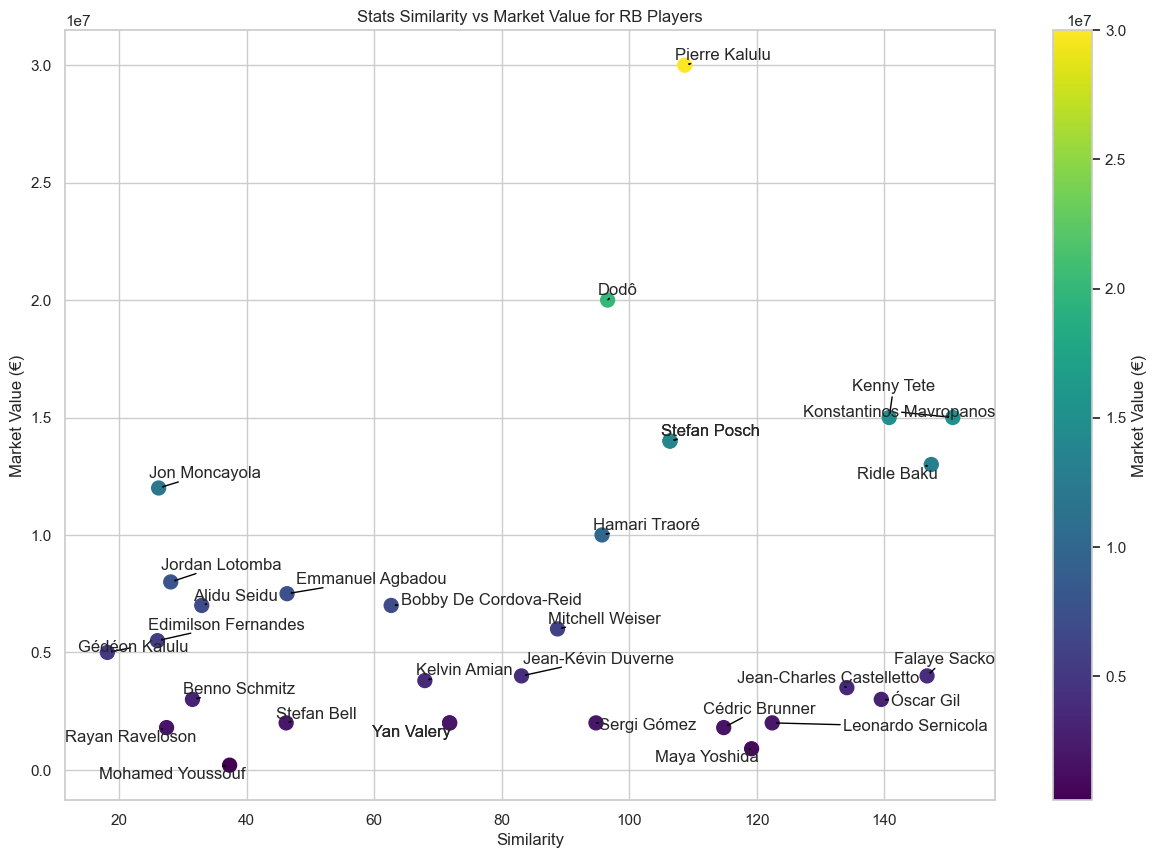

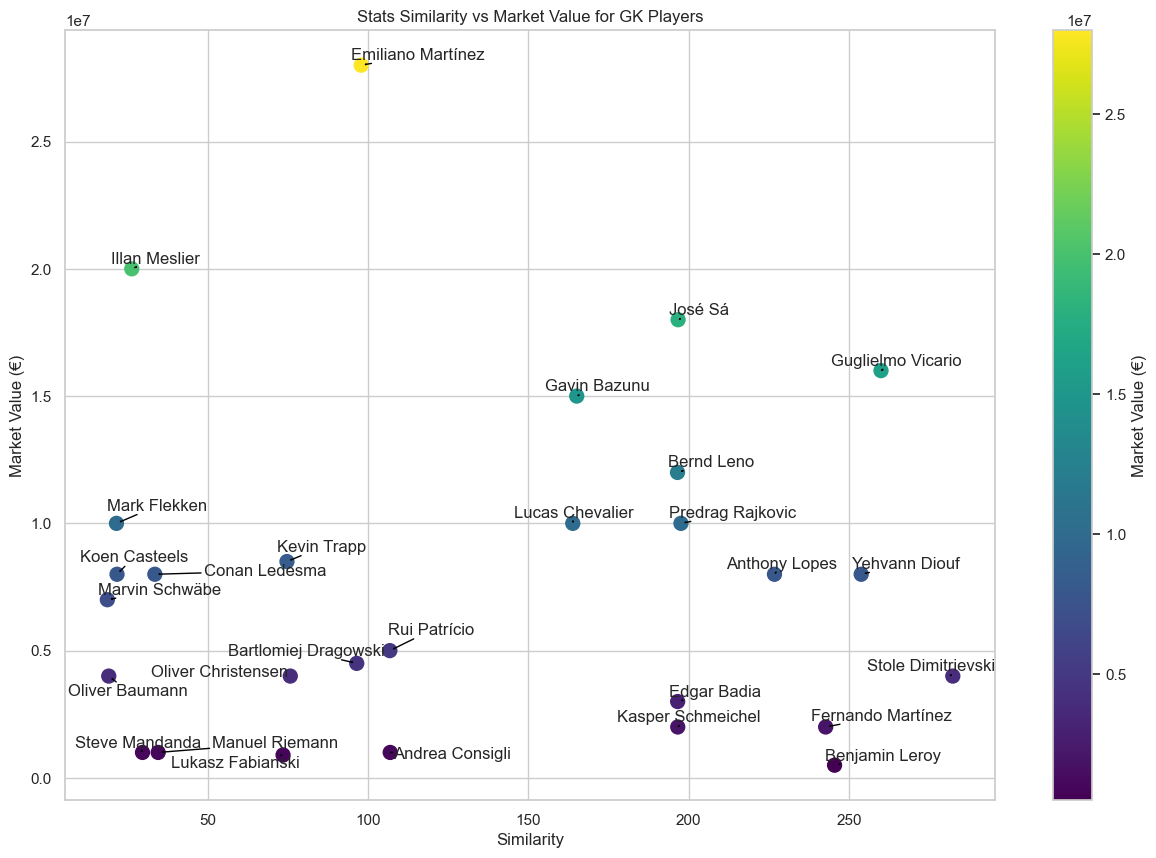

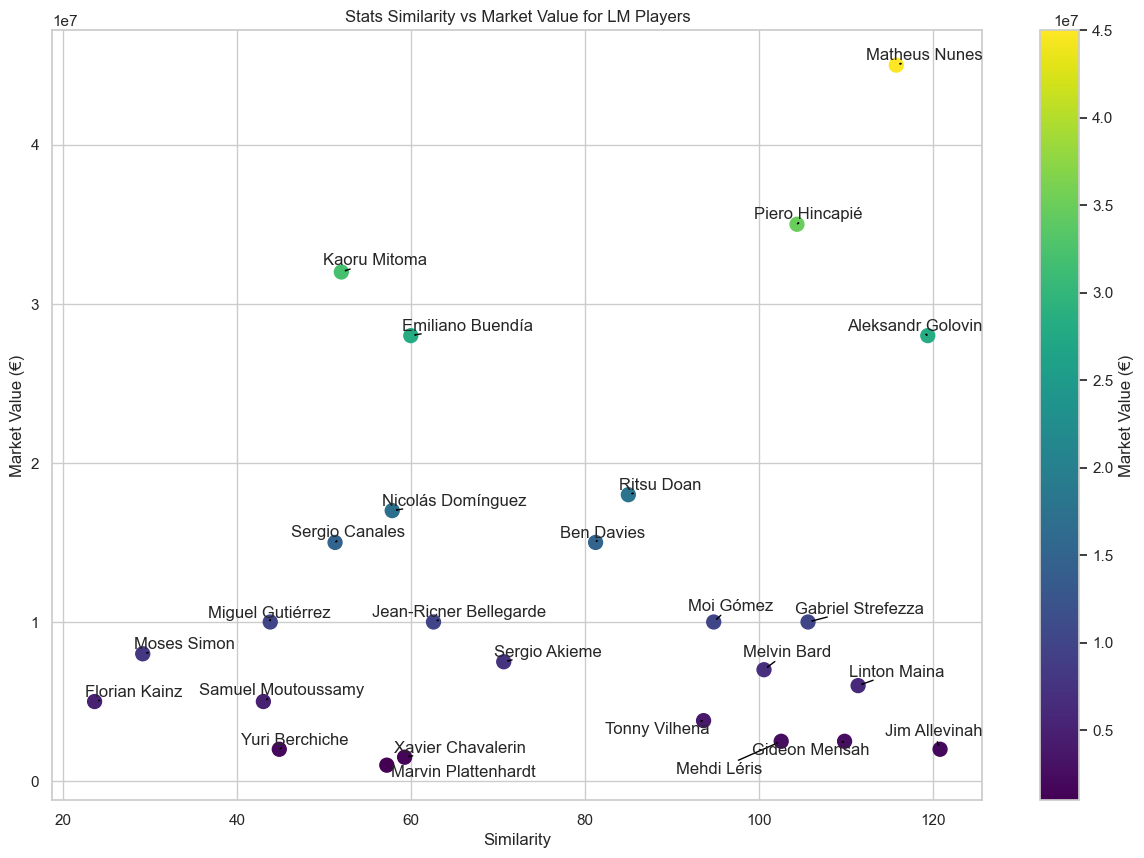

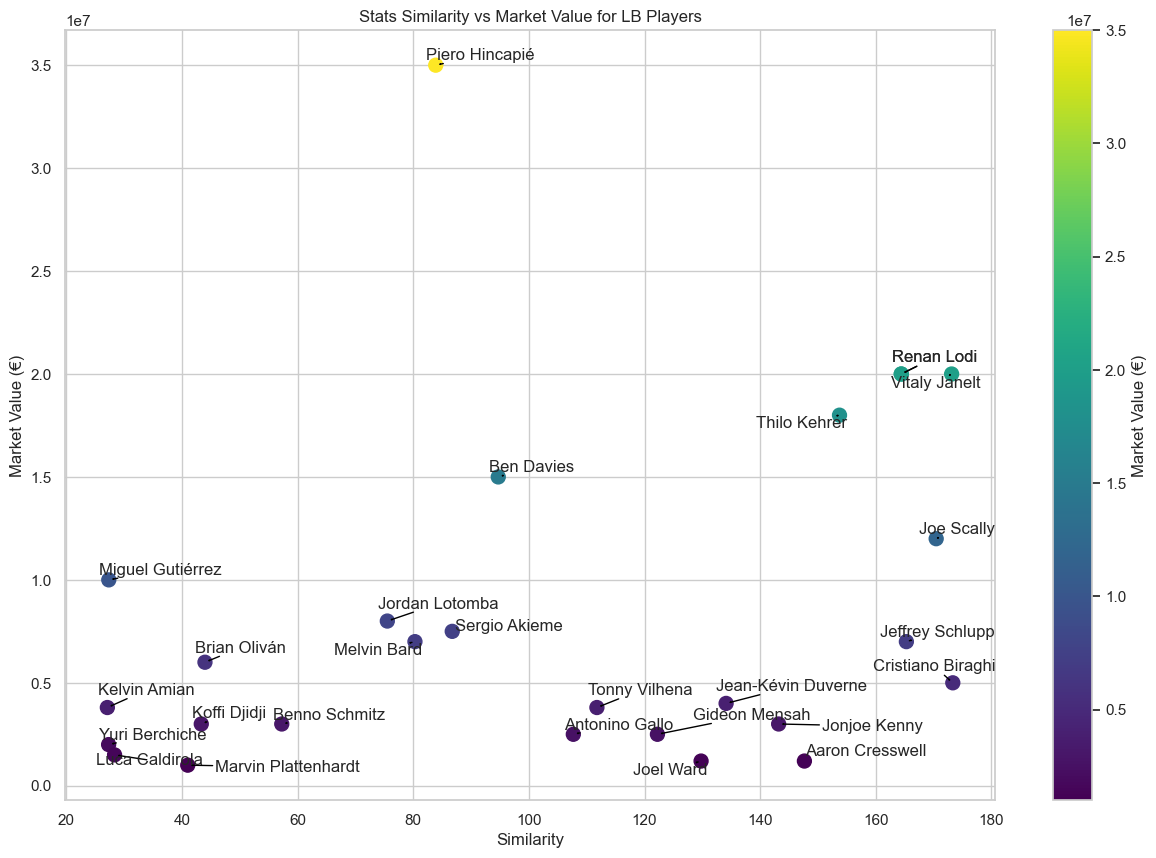

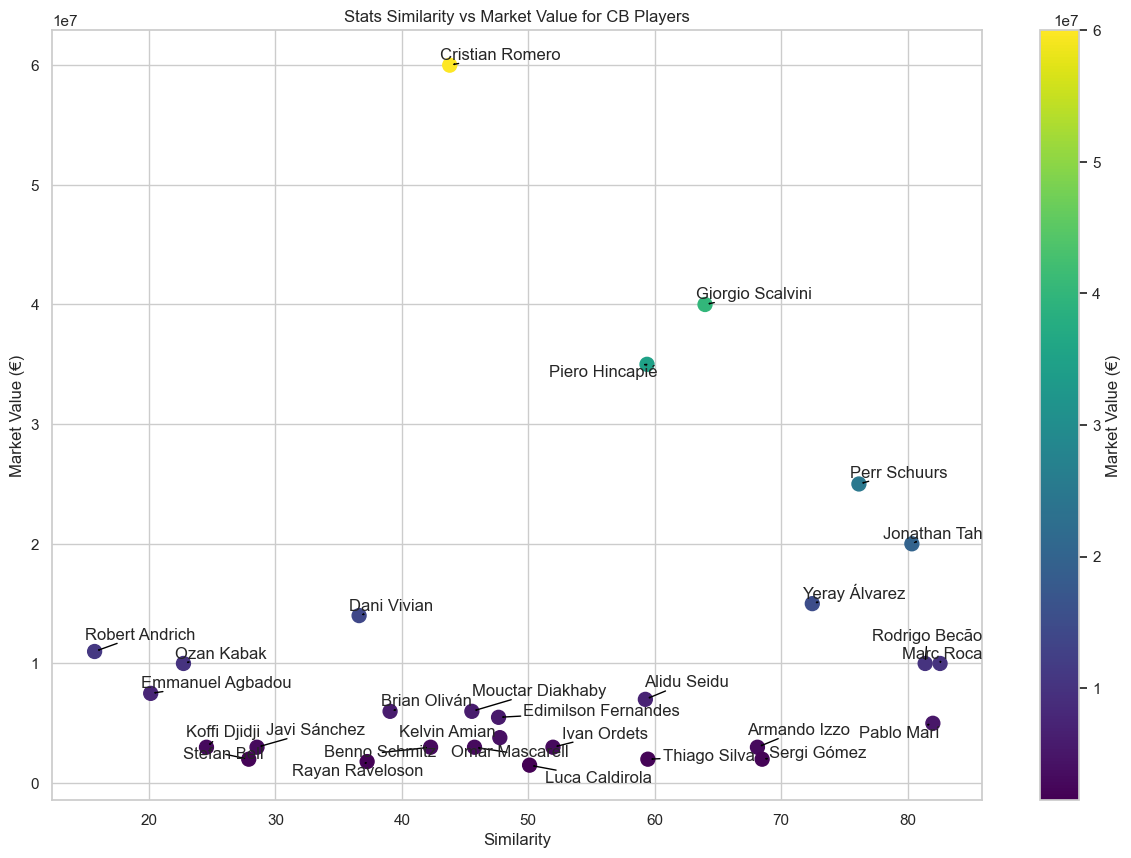

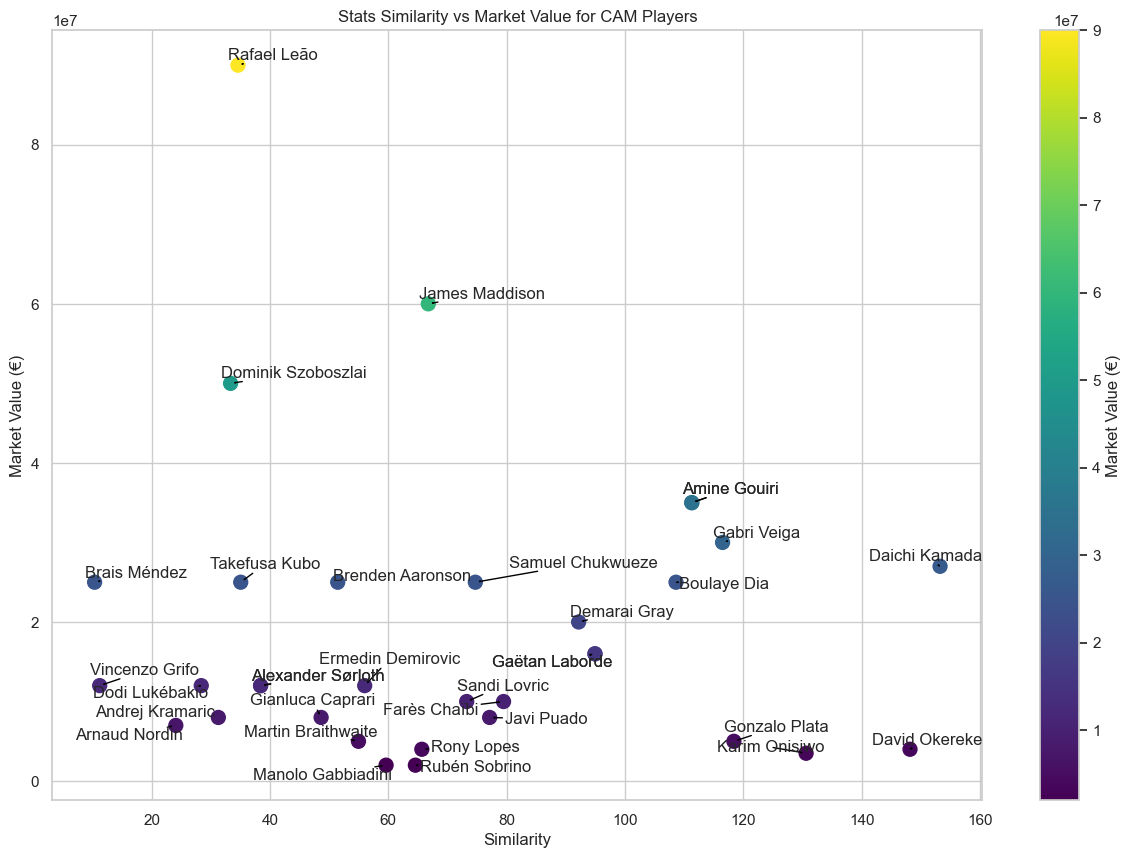

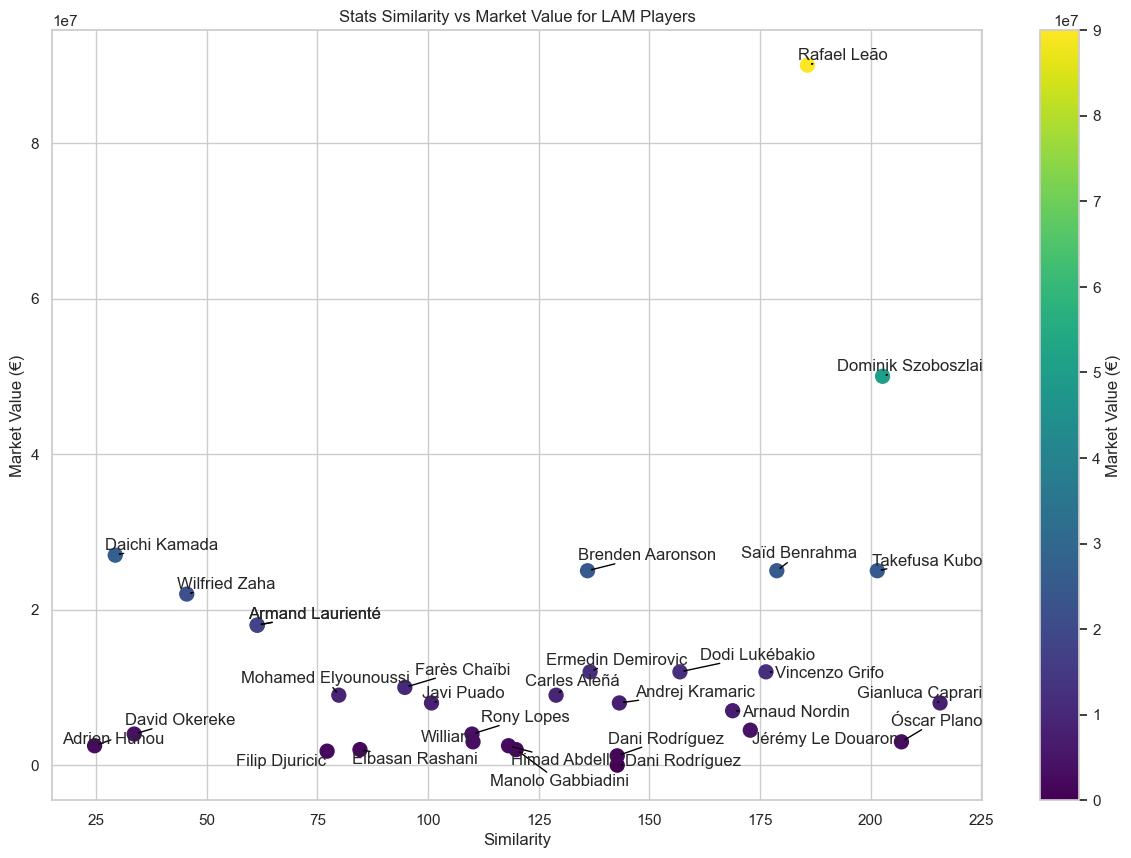

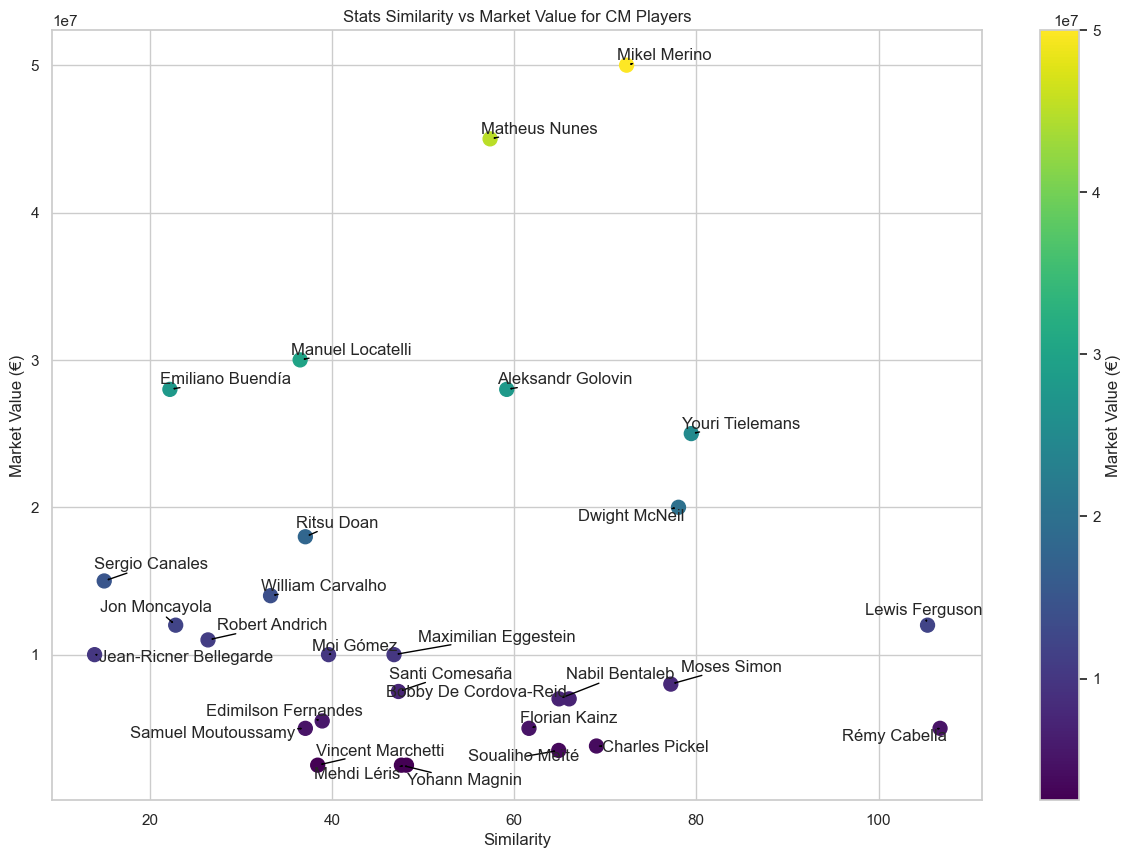

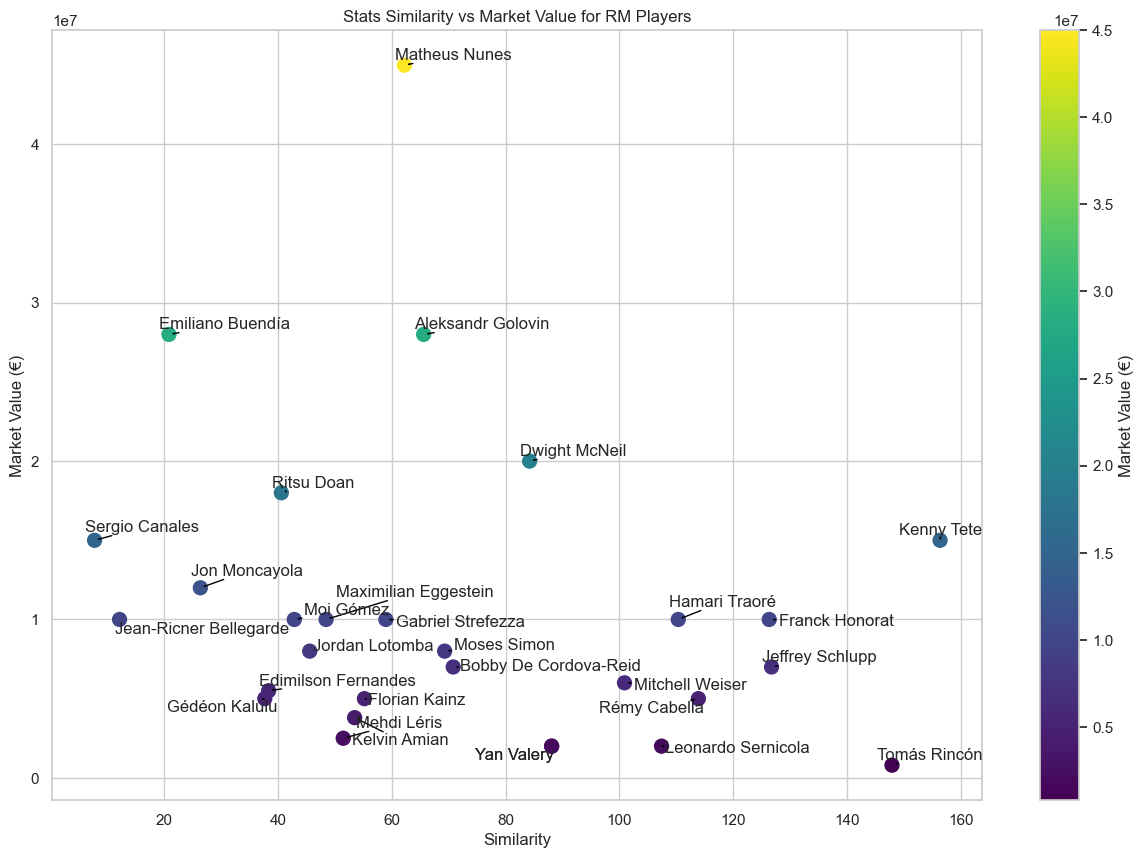

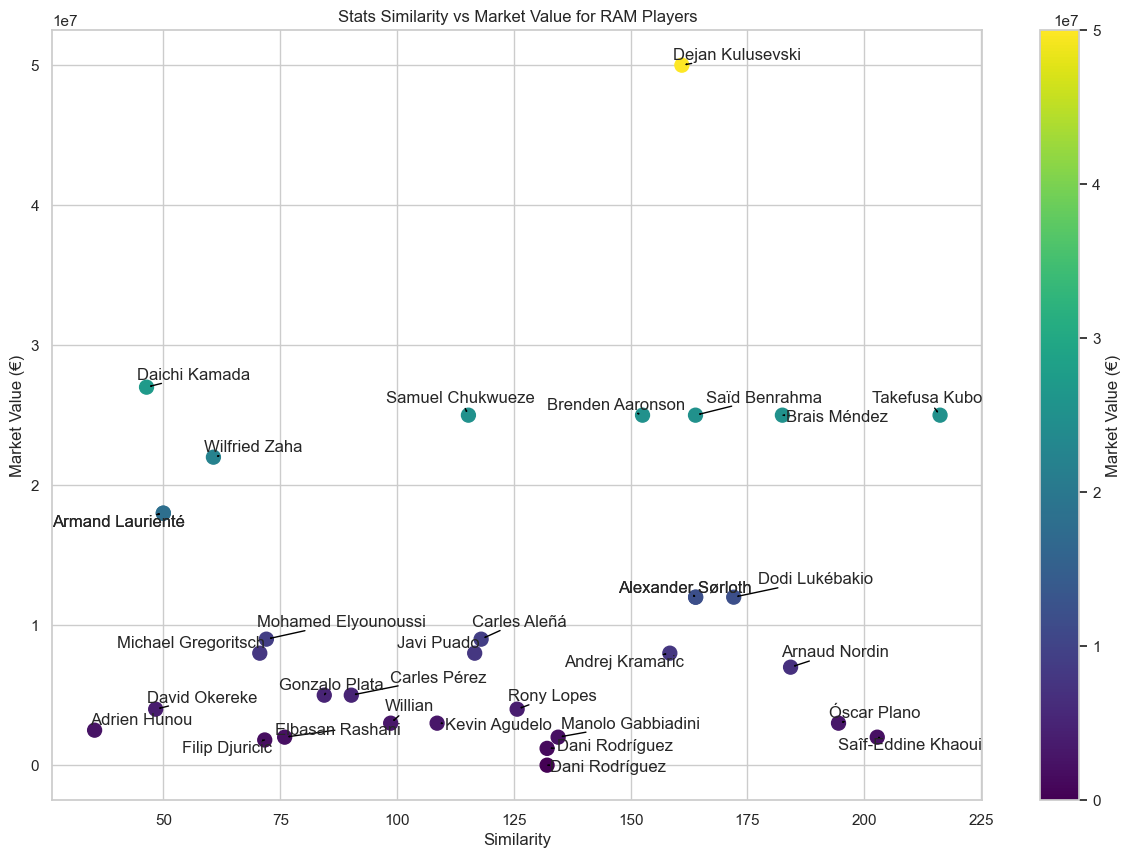

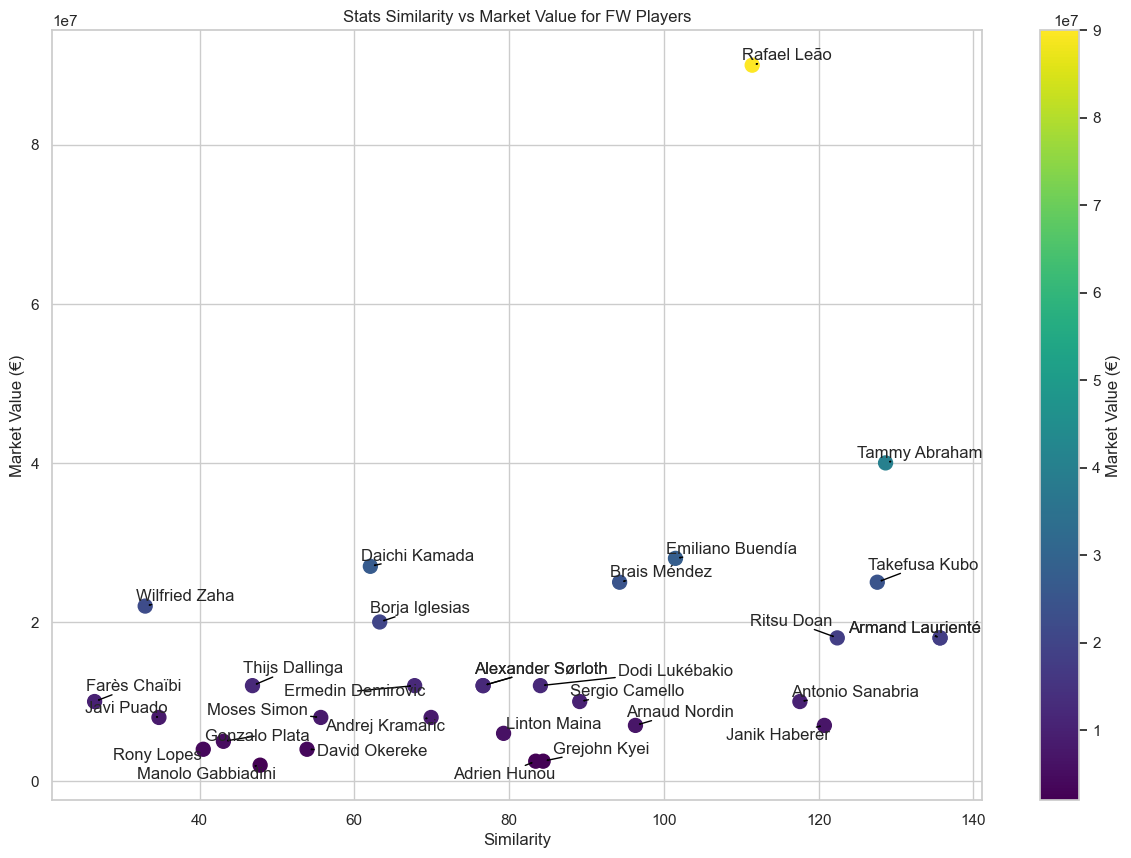

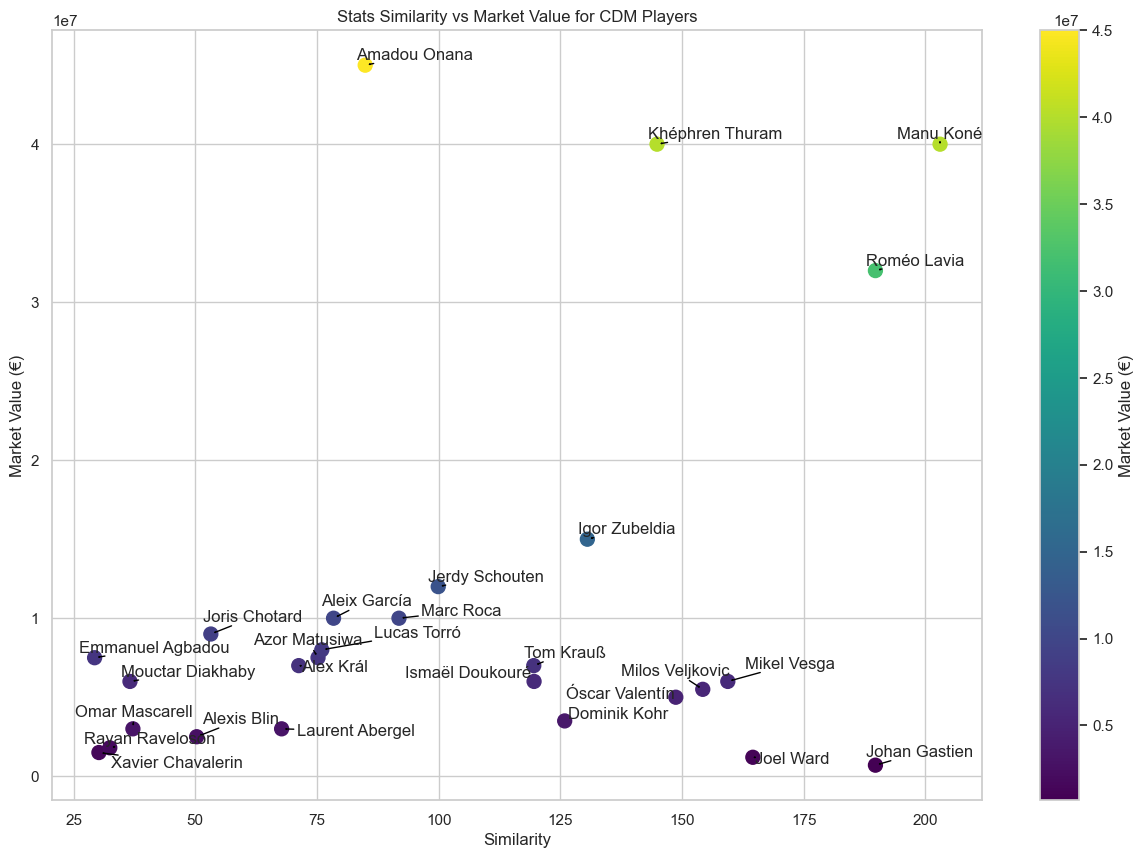

In [20]:
for position, players in similar_players_by_position.items():
    player_names = players['player_name'].tolist()
    market_values = all_players_values[all_players_values['Name'].isin(player_names)]
    plot_data = pd.merge(players[['player_name', 'similarity']], market_values.rename(columns={'Name': 'player_name'}), on='player_name')

    norm = Normalize(vmin=plot_data['Market Value'].min(), vmax=plot_data['Market Value'].max())
    cmap = plt.get_cmap('viridis')
    sm = ScalarMappable(norm=norm, cmap=cmap)
    
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(x=plot_data['similarity'], y=plot_data['Market Value'], s=100, c=plot_data['Market Value'].apply(lambda x: sm.to_rgba(x)))
    plt.colorbar(sm, label='Market Value (€)')

    texts = []
    for i, txt in enumerate(plot_data['player_name']):
        texts.append(plt.text(plot_data['similarity'].iloc[i], plot_data['Market Value'].iloc[i], txt, ha='center'))
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

    plt.xlabel('Similarity')
    plt.ylabel('Market Value (€)')
    plt.title(f'Stats Similarity vs Market Value for {position} Players')
    plt.show()